In [0]:
from keras.datasets import mnist
from keras.layers import Dense,Input
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [0]:
(X_train,_),(x_test,_) = mnist.load_data()
X_train = X_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255
X_train = X_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)

11493376/11490434 [==============================] - 4s 0us/step


In [0]:
X_train.shape

(60000, 784)

In [0]:
X_test.shape

(10000, 784)

In [0]:
def autoencoder():
  
  inputImage = Input(shape=(784,))
  encode = Dense(units=32,activation="relu")(inputImage)
  decode = Dense(units=784,activation="relu")(encode)
  autoencoder = Model(inputImage,decode)
  autoencoder.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer="adadelta")
  
  return autoencoder

In [0]:
model = autoencoder()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
def encoder():
  inputImage = Input(shape=(784,))
  encode = Dense(units=32,activation="relu")(inputImage)
  encoder = Model(inputImage,encode)
  return encoder

In [0]:
encoder = encoder()
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
h = model.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.3755 - acc: 0.8005 - val_loss: 0.3002 - val_acc: 0.7992
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2741 - acc: 0.8027 - val_loss: 0.2498 - val_acc: 0.8034
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2364 - acc: 0.8054 - val_loss: 0.2228 - val_acc: 0.8056
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2162 - acc: 0.8075 - val_loss: 0.2104 - val_acc: 0.8074
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2064 - acc: 0.8088 - val_loss: 0.2019 - val_acc: 0.8085
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1976 - acc: 0.8097 - val_loss: 0.1901 - val_acc: 0.8092
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0

In [0]:
predictedImage = model.predict(X_test)

In [0]:
demoPredictedImage = predictedImage[0].reshape(28,28)

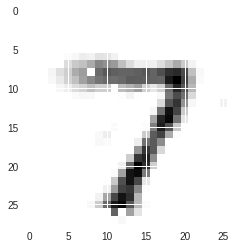

In [0]:
plt.imshow(demoPredictedImage)

In [0]:
encodedImage = encoder.predict(X_test)

In [0]:
demoEncodedImage = encodedImage[0].reshape(8,4)

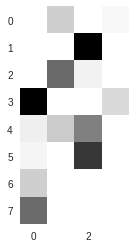

In [0]:
plt.imshow(demoEncodedImage)
plt.grid(False)

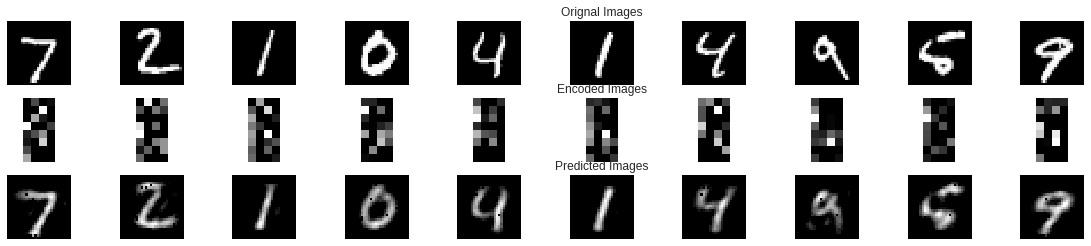

In [0]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    if(i==5):
      ax.set_title("Orignal Images")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encodedImage[i].reshape(8,4))
    if(i==5):
      ax.set_title("Encoded Images")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predictedImage[i].reshape(28, 28))
    if(i==5):
      ax.set_title("Predicted Images")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()